In [2]:
import numpy
import pandas
from pandas import concat

#linear regression calculation
from scipy import stats

#Import sampling helper
from sklearn.model_selection import train_test_split
#Import preprocessing modules
from sklearn import preprocessing
#Import random forest model
from sklearn.ensemble import RandomForestRegressor
#Import logist regression model
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

#Import cross-validation pipelinePython
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#Import evaluation metricsPython
from sklearn.metrics import mean_squared_error, r2_score

#Import module for saving scikit-learn modelsPython
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

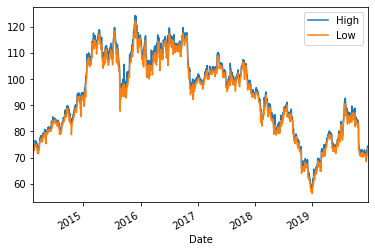

In [48]:
ABInbevQuandl = pandas.read_csv('https://www.quandl.com/api/v3/datasets/EURONEXT/ABI.csv?api_key=_czXMKeX32eTXGttzD8H',
                                parse_dates=[0],
                                index_col=[0])
ABInbevQuandl.sort_index(inplace=True)
ABInbevQuandl[['High','Low']].plot()

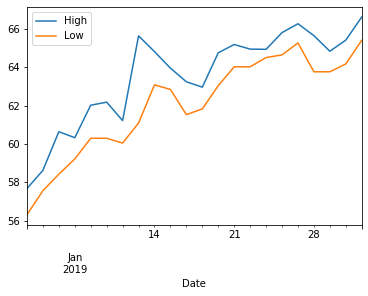

In [49]:
#Retrieve only the value for Jan 2019 (order of the value in the set is important for the selection)
ABJan = ABInbevQuandl.loc['2019-01-01':'2019-01-31']
ABJan[['High','Low']].plot()


In [52]:
ABJan.reset_index(inplace=True)


,Date,Open,High,Low,Last,Volume,Turnover
0,2019-01-02,57.40,57.68,56.32,57.47,1946215.0,1.113637e+08
1,2019-01-03,58.00,58.63,57.57,58.17,1929456.0,1.120513e+08
2,2019-01-04,58.89,60.64,58.43,60.54,3155092.0,1.881410e+08
3,2019-01-07,60.30,60.33,59.22,60.28,2268530.0,1.360552e+08
4,2019-01-08,60.30,62.02,60.30,61.47,2481093.0,1.522351e+08
5,2019-01-09,62.14,62.18,60.30,60.78,2468822.0,1.508911e+08
6,2019-01-10,60.51,61.22,60.05,61.22,1620498.0,9.847338e+07
7,2019-01-11,61.22,65.63,61.09,63.49,4526127.0,2.879587e+08
8,2019-01-14,63.85,64.81,63.08,63.18,2471767.0,1.571145e+08
9,2019-01-15,63.30,63.95,62.84,63.54,1860393.0,1.180242e+08


LinregressResult(slope=0.36881422924901197, intercept=58.178814229249014, rvalue=0.9262664588584617, pvalue=6.307583602676331e-10, stderr=0.03355424409964924)

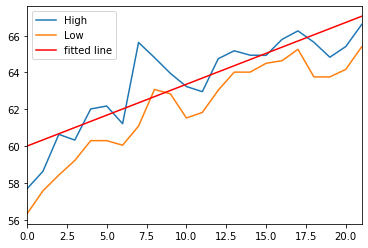

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ABJan.index,ABJan['High'])
plt=ABJan[['High','Low']].plot()
plt.plot(ABJan.index, intercept + slope*ABJan.index, 'r', label='fitted line')
plt.legend()

stats.linregress(ABJan.index,ABJan['Low'])